# Machine Learning - Supervised - Classification
machine learning yang membuat prediksi tipe kategorikal.

1. pilih tipe algoritma: salah satu algoritma classification
2. masukkan data: pisahin jadi fitur dan target
3. latih - menggunakan sklearn
4. dapat model yang sudah terlatih - jangan lupa untuk tes akurasi modelnya

step-step membuat model ML masih sama, kita mulai dari persiapan data.
1. persiapan data
2. rapiin data
  - data harus numerik, kalau ada data text kita encoding dulu
  - pilih fitur dan target
  - pisahin jadi training dan testing dataset
3. pilih algoritma dan latih model
4. evaluasi model
  - regression model: R-squared
  - classification model: confusion matrix dan classification report
5. tuning - kembali ke step 1-4 untuk mencoba membuat model lebih baik

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

kali ini kita akan latihan membuat model tipe klasifikasi dengan data diabetes [raw data](https://raw.githubusercontent.com/stefkwan-h8/dataset/main/diabetes.csv)

kita akan membuat model yang bisa memprediksi apakah seseorang memiliki diabetes atau tidak, jika kita punya informasi tentang:
- Pregnancies
- Glucose
- BloodPressure
- SkinThickness
- Insulin
- BMI
- DiabetesPedigreeFunction
- Age

In [ ]:
# 1. import data

df_diabetes = pd.read_csv("https://raw.githubusercontent.com/stefkwan-h8/dataset/main/diabetes.csv")
df_diabetes.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


In [ ]:
df_diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


ada 768 data, tidak ada missing value, semuanya sudah berbentuk numerik

kita bisa skip data cleaning untuk missing value

kita bisa skip data preparation untuk encoding (convert text -> angka)

In [ ]:
# 2. persiapan data
# kita pisahkan data yg untuk fitur, dan yg untuk target/ label

fitur = df_diabetes.drop(columns=['Outcome'])
target = df_diabetes['Outcome']

display(fitur.head())
display(target[:5])

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [ ]:
# 3. pilih algoritma dan latih model
# Logistic Regression
model_LR = LogisticRegression()
model_LR.fit(fitur, target)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
# 4. evaluasi model
# apakah model ini bisa memprediksi seseorang punya diabetes/ tidak dengan baik?

x = fitur
y = target # target dari dataset
y_pred = model_LR.predict(x) # target dari hasil prediksi

print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.89      0.84       500
           1       0.74      0.57      0.65       268

    accuracy                           0.78       768
   macro avg       0.77      0.73      0.75       768
weighted avg       0.78      0.78      0.77       768



In [ ]:
confusion_matrix(y, y_pred)

array([[447,  53],
       [114, 154]])

baris pertama aslinya 0 sehat dan hasil prediksi nya 447 ditebak sebagai 0 sehat,  53 ditebak sebagai 1 sakit

baris kedua aslinya 1 sakit dan hasil prediksi model kita 114 ditebak sebagai 0 sehat,  154 ditebak sebagai 1 sakit

dari total 447+53 orang sehat, hanya 447 yang berhasil diprediksi model kita sebagai orang sehat. ada 53 yang salah klasifikasi, orang sehat dibilang sakit sama modelnya

dari total 114+154 orang sakit, hanya 154 yang berhasil diprediksi model kita sebagai orang sakit. ada 114 orang yang salah klasifikasi, orang sakit dibilang sehat sama modelnya

1. mau membuat model Machine Learning? Ya
2. apakah ada target/label yang mau di prediksi?
  - Ya -> Supervised
  - Tidak -> Unsupervised
3. kalau Supervised, apakah target/label bersifat continuous atau discrete?
  - continuous: uang, harge, waktu, umur, tinggi, panjang, berat, yg berjalan terus tanpa pembatas --> Regression Model
  - discrete: hasil lempar dadu 1 2 3 4 5 6, sakit atau tidak 0 1, warna apa merah hijau kuning 0 1 2 --> Classification Model

Regression Model akan menggunakan algoritma ML seperti:
- Linear Regression
- Polynomial Regression

Classification Model akan menggunakan algoritma ML seperti:
- Naive Bayes
- Decision Tree
- Random Forest
- Logistic Regression
- KNN, K Nearest Neighbor
- SVM, Support Vector Machine
- dan lain2...

saat hal yang mau kita prediksi bentuknya kategori, kita gunakan model Classification

kategori itu apa? bisa apapun asalkan tidak continuous
- rating restoran berapa bintang, 1 2 3 4 5 bintang, ini ada 5 kategori
- gambar apa, anjing atau kucing? 2 pilihan, 2 kategori
- diberikan harga mobil, tahun, jumlah pintu, tipe mesin, kita mau tebak jenis mobil nya (suv, sedan, truk), 3 pilihan jenis mobil, ada 3 kategori


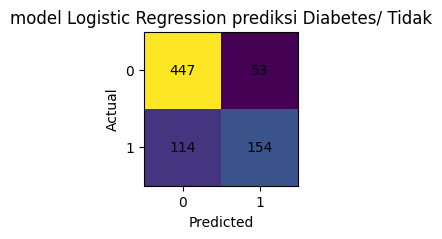

In [ ]:
# optional
# buat confusion matrix yang lebih visual

def visualCM(y, y_pred, total_label=2, title=""):
  cm = confusion_matrix(y, y_pred)
  fig, ax = plt.subplots(figsize=(total_label, total_label))
  ax.imshow(cm)
  ax.grid(False)
  ticks = range(0, total_label)
  ax.xaxis.set(ticks=ticks, ticklabels=ticks)
  ax.yaxis.set(ticks=ticks, ticklabels=ticks)
  ax.set_ylim(total_label-0.5, -0.5)
  for i in range(total_label):
      for j in range(total_label):
          ax.text(j, i, cm[i, j], ha='center', va='center', color='black')
  plt.title(title)
  plt.xlabel("Predicted")
  plt.ylabel("Actual")
  plt.show()

visualCM(y, y_pred, 2, "model Logistic Regression prediksi Diabetes/ Tidak")

diatas kubuat sebuah function untuk mengubah confusion matrix kita dari list dua dimensi menjadi gambar graph dengan judul dan label axis

dari 447 + 53 orang sehat kategori 0 di dataset kita

In [ ]:
447 + 53

500

model kita berhasil prediksi 447 dengan benar.

In [ ]:
447/500

0.894

recall untuk kategori 0 ada di 0.894

dari sebuah kategori, berapa banyak yang berhasil diprediksi dengan benar

lanjut, dari hasil prediksi kita, ada 447 + 114 orang yang dibilang/dikategorikan/ditebak sehat. model kita bilang sekian banyak orang sehat kategori 0

In [ ]:
447+114

561

padahal yang benar adalah 447 orang saja yang beneran sehat

In [ ]:
447 / 561

0.7967914438502673

precision ada di 0.80, kalau model kita bilang seseorang itu sehat, hanya 80% kemungkinan itu beneran sehat

dari sebuah hasil prediksi, berapa kemungkinan itu diprediksi dengan benar

terakhir, F1-Score adalah rata2 antara precision dan recall, seperti overall accuracy dalam sebuah kategori

In [ ]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.89      0.84       500
           1       0.74      0.57      0.65       268

    accuracy                           0.78       768
   macro avg       0.77      0.73      0.75       768
weighted avg       0.78      0.78      0.77       768



---
tes load gambar

In [ ]:
# from PIL import Image
# import numpy as np

# im_frame = Image.open('angka3.png')
# np_frame = np.array(im_frame.getdata())
# np_frame

# Case Study - Digits
kita akan load data gambar tulisan tangan angka angka 0-9 dari from sklearn.datasets import load_digits

ini adalah data 64 pixels dalam sebuah gambar 8 kali 8.

setiap kolom data di dataset ini adalah satu pixel di sebuah gambar.

gambar pun kita convert jadi data numerik baru bisa kita gunakan di ML.

semua data di komputer itu disimpan dalam bentuk numerik. termasuk data gambar dan data audio, bahkan termasuk data text. semua data di konversi oleh komputer menjadi numerik, angka.

di contoh ini, kita mendapatkan data gambar ukuran 8x8 pixel

In [ ]:
fitur, target = load_digits(return_X_y=True)

digits = np.array(fitur)
target = np.array(target)

display(digits[:5])
display(target[:5])

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
        15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
        12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
         0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
        10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.],
       [ 0.,  0.,  0., 12., 13.,  5.,  0.,  0.,  0.,  0.,  0., 11., 16.,
         9.,  0.,  0.,  0.,  0.,  3., 15., 16.,  6.,  0.,  0.,  0.,  7.,
        15., 16., 16.,  2.,  0.,  0.,  0.,  0.,  1., 16., 16.,  3.,  0.,
         0.,  0.,  0.,  1., 16., 16.,  6.,  0.,  0.,  0.,  0.,  1., 16.,
        16.,  6.,  0.,  0.,  0.,  0.,  0., 11., 16., 10.,  0.,  0.],
       [ 0.,  0.,  0.,  4., 15., 12.,  0.,  0.,  0.,  0.,  3., 16., 15.,
        14.,  0.,  0.,  0.,  0.,  8., 13.,  8., 16.,  0.,  0.,  0.,  0.,
         1.,  6., 15., 11.,  0.,  0.,  0.,  1.,  8., 13., 15.,  1.,  0.,
         0.,  0.,  9., 16., 16.,  5.,  0.,  0.,  0.,  0.,  

array([0, 1, 2, 3, 4])

ini adalah data 64 pixel di sebuah gambar yang aslinya berukuran 8 x 8

In [ ]:
 np.array([ 0.,  0.,  0.,  4., 15., 12.,  0.,  0.,
 0.,  0.,  3., 16., 15., 14.,  0.,  0.,  0.,  0.,  8., 13.,  8., 16.,  0.,  0.,  0.,  0.,
         1.,  6., 15., 11.,  0.,  0.,  0.,  1.,  8., 13., 15.,  1.,  0.,
         0.,  0.,  9., 16., 16.,  5.,  0.,  0.,  0.,  0.,  3., 13., 16.,
        16., 11.,  5.,  0.,  0.,  0.,  0.,  3., 11., 16.,  9.,  0.])

array([ 0.,  0.,  0.,  4., 15., 12.,  0.,  0.,  0.,  0.,  3., 16., 15.,
       14.,  0.,  0.,  0.,  0.,  8., 13.,  8., 16.,  0.,  0.,  0.,  0.,
        1.,  6., 15., 11.,  0.,  0.,  0.,  1.,  8., 13., 15.,  1.,  0.,
        0.,  0.,  9., 16., 16.,  5.,  0.,  0.,  0.,  0.,  3., 13., 16.,
       16., 11.,  5.,  0.,  0.,  0.,  0.,  3., 11., 16.,  9.,  0.])

64 pixel ini bisa kita ubah balik menjadi sebuah gambar berukuran 8x8 pixel

In [ ]:
 np.array([ 0.,  0.,  0.,  4., 15., 12.,  0.,  0.,
 0.,  0.,  3., 16., 15., 14.,  0.,  0.,  0.,  0.,  8., 13.,  8., 16.,  0.,  0.,  0.,  0.,
         1.,  6., 15., 11.,  0.,  0.,  0.,  1.,  8., 13., 15.,  1.,  0.,
         0.,  0.,  9., 16., 16.,  5.,  0.,  0.,  0.,  0.,  3., 13., 16.,
        16., 11.,  5.,  0.,  0.,  0.,  0.,  3., 11., 16.,  9.,  0.]).reshape((8,8))

array([[ 0.,  0.,  0.,  4., 15., 12.,  0.,  0.],
       [ 0.,  0.,  3., 16., 15., 14.,  0.,  0.],
       [ 0.,  0.,  8., 13.,  8., 16.,  0.,  0.],
       [ 0.,  0.,  1.,  6., 15., 11.,  0.,  0.],
       [ 0.,  1.,  8., 13., 15.,  1.,  0.,  0.],
       [ 0.,  9., 16., 16.,  5.,  0.,  0.,  0.],
       [ 0.,  3., 13., 16., 16., 11.,  5.,  0.],
       [ 0.,  0.,  0.,  3., 11., 16.,  9.,  0.]])

angka2 ini menunjukkan value setiap pixel di gambar ini. kita bisa minta bantuan plt dari matplotlib untuk menggambarkan gambarnya

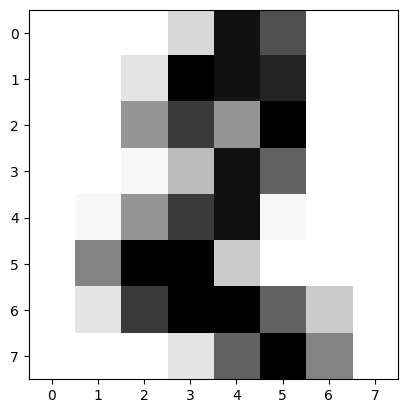

In [ ]:
plt.imshow(
     np.array([ 0.,  0.,  0.,  4., 15., 12.,  0.,  0.,
         0.,  0.,  3., 16., 15., 14.,  0.,  0.,  0.,  0.,  8., 13.,  8., 16.,  0.,  0.,  0.,  0.,
         1.,  6., 15., 11.,  0.,  0.,  0.,  1.,  8., 13., 15.,  1.,  0.,
         0.,  0.,  9., 16., 16.,  5.,  0.,  0.,  0.,  0.,  3., 13., 16.,
        16., 11.,  5.,  0.,  0.,  0.,  0.,  3., 11., 16.,  9.,  0.]).reshape((8,8)),
      cmap = "Greys",
)

In [ ]:
# ambil 1 data saja, satu gambar 8 kali 8 pixel
digits[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

data diatas adalah 64 pixel dengan masing2 memiliki value warna. warna 0 = putih, makin besar angkanya, makin gelap warnanya. ini data gambar hitam putih.

In [ ]:
digits[0].reshape((8,8))

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

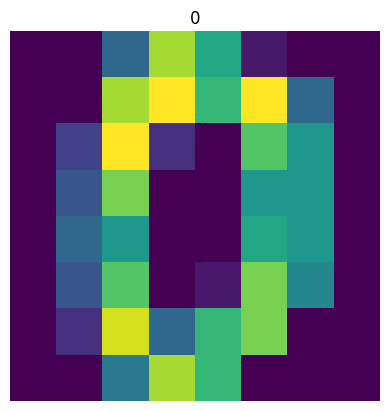

In [ ]:
def lihatDigits(n):
  plt.imshow(digits[n].reshape((8,8)))
  plt.title(target[n])

  plt.axis('off')
  plt.show()

lihatDigits(0)

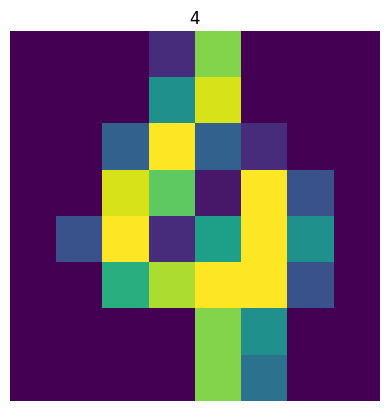

In [ ]:
lihatDigits(100)

optional - yang sudah kita lakukan adalah melihat raw data nya dalam bentuk gambar. diatas contohnya, data gambar kita adalah angka 4, dan targetnya juga bilang itu angka 4.

In [ ]:
print(len(digits))

1797


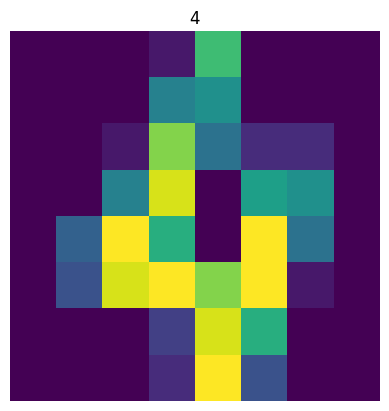

In [ ]:
# kita punya 1797 data

lihatDigits(4)

In [ ]:
# 1. import data beres, kita ngerti datanya
# 2. prep data, sudah kita pisahin fitur dan target
# tambahan: split datanya jadi data latihan dan data ujian, train dan test dataset

# biasanya x = fitur, y = target
x = digits
y = target
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [ ]:

# 3. buat model dan latih model
# tambahan: latih model pakai data latihan

model_digits_LR = LogisticRegression()
model_digits_LR.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
# 4. evaluasi, seberapa akurat model kita?
# tambahan: evaluasi model pakai data test

y_pred = model_digits_LR.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        27
           1       0.92      0.97      0.94        35
           2       0.97      0.97      0.97        36
           3       0.97      1.00      0.98        29
           4       0.97      0.97      0.97        30
           5       0.97      0.93      0.95        40
           6       1.00      0.98      0.99        44
           7       0.97      0.97      0.97        39
           8       0.97      0.92      0.95        39
           9       0.93      0.98      0.95        41

    accuracy                           0.97       360
   macro avg       0.97      0.97      0.97       360
weighted avg       0.97      0.97      0.97       360



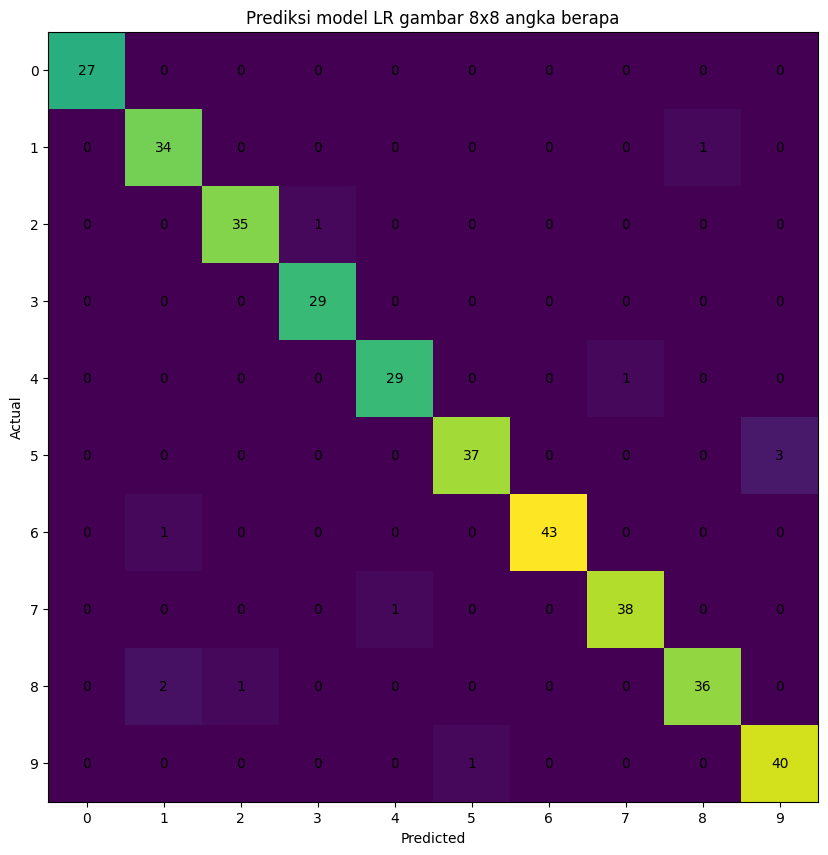

In [ ]:
visualCM(y_test, y_pred, 10, "Prediksi model LR gambar 8x8 angka berapa")

kita sudah buat model yang bisa prediksi sebuah gambar 8x8 pixel itu tulisan tangan untuk angka berapa

# KNN
K- Neighbors Classifier

teknik berbeda untuk mengklasifikasi data

In [ ]:
model_digits_knn = KNeighborsClassifier(n_neighbors=3)
model_digits_knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

reminder: data asli kita sudah ada jawabannya. x_train adalah 80% data awal kita dan masing-masing data punya jawaban targetnya y_train, kalo gk latihan darimana kan ya? lalu x_test dan y_test juga udah sepasang.

untuk evaluasi, kita menggunakan data testing yang belum pernah dilihat oleh model kita saat latihan.

kenapa dibuat dua set seperti ini? untuk mengurangi kemungkinan model kita cuma hapalan aja data training nya, dengan begini kita bisa tau akurasi model dengan data yang belum pernah dia lihat sebelumnya.

In [ ]:
# evaluasi
y_pred = model_digits_knn.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        27
           1       1.00      0.97      0.99        35
           2       0.97      1.00      0.99        36
           3       0.93      0.97      0.95        29
           4       1.00      0.97      0.98        30
           5       0.97      0.97      0.97        40
           6       1.00      1.00      1.00        44
           7       0.97      1.00      0.99        39
           8       1.00      0.95      0.97        39
           9       0.98      1.00      0.99        41

    accuracy                           0.98       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.98      0.98       360



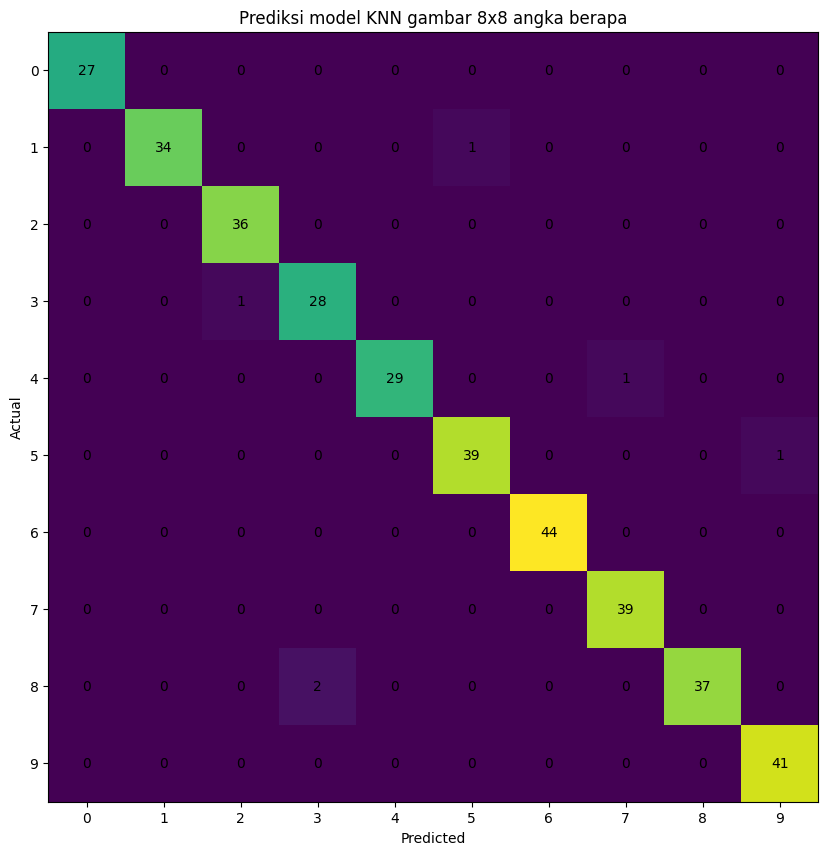

In [ ]:
visualCM(y_test, y_pred, 10, "Prediksi model KNN gambar 8x8 angka berapa")

## recap
- classification ML
- Logistic Regression dan KNN
- semua data, termasuk gambar, disimpan secara numerik di komputer
- splitting data jadi training dan testing dataset
- encoding: convert text jadi numeric